# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [82]:
#pip install citipy

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [84]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 626


In [99]:
#cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [100]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]

        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                            "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

city_data



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | san pedro
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | semirara
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | salinopolis
Processing Record 10 of Set 1 | simplicio mendes
Processing Record 11 of Set 1 | sulangan
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | adrar
Processing Record 15 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 16 of Set 1 | port hardy
Processing Record 17 of Set 1 | dingle
Processing Record 18 of Set 1 | lusambo
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | asosa
Processing Record 21 of Set 1 | barrow
Processing Record 

[{'City': 'ribeira grande',
  'Lat': 38.5167,
  'Lng': -28.7,
  'Max Temp': 12.65,
  'Humidity': 68,
  'Cloudiness': 58,
  'Wind Speed': 1.79,
  'Country': 'PT',
  'Date': 1680493777},
 {'City': 'port alfred',
  'Lat': -33.5906,
  'Lng': 26.891,
  'Max Temp': 18.43,
  'Humidity': 88,
  'Cloudiness': 100,
  'Wind Speed': 0.89,
  'Country': 'ZA',
  'Date': 1680493778},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 11.81,
  'Humidity': 43,
  'Cloudiness': 20,
  'Wind Speed': 3.6,
  'Country': 'AR',
  'Date': 1680493778},
 {'City': 'san pedro',
  'Lat': 14.35,
  'Lng': 121.0167,
  'Max Temp': 33.51,
  'Humidity': 58,
  'Cloudiness': 20,
  'Wind Speed': 1.54,
  'Country': 'PH',
  'Date': 1680493778},
 {'City': 'hasaki',
  'Lat': 35.7333,
  'Lng': 140.8333,
  'Max Temp': 14.22,
  'Humidity': 53,
  'Cloudiness': 21,
  'Wind Speed': 9.31,
  'Country': 'JP',
  'Date': 1680493484},
 {'City': 'georgetown',
  'Lat': 5.4112,
  'Lng': 100.3354,
  'Max Temp': 26.96,
  'Humidity':

In [102]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [103]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,12.65,68,58,1.79,PT,1680493777
1,port alfred,-33.5906,26.8910,18.43,88,100,0.89,ZA,1680493778
2,ushuaia,-54.8000,-68.3000,11.81,43,20,3.60,AR,1680493778
3,san pedro,14.3500,121.0167,33.51,58,20,1.54,PH,1680493778
4,hasaki,35.7333,140.8333,14.22,53,21,9.31,JP,1680493484


In [104]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [105]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,12.65,68,58,1.79,PT,1680493777
1,port alfred,-33.5906,26.8910,18.43,88,100,0.89,ZA,1680493778
2,ushuaia,-54.8000,-68.3000,11.81,43,20,3.60,AR,1680493778
3,san pedro,14.3500,121.0167,33.51,58,20,1.54,PH,1680493778
4,hasaki,35.7333,140.8333,14.22,53,21,9.31,JP,1680493484


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

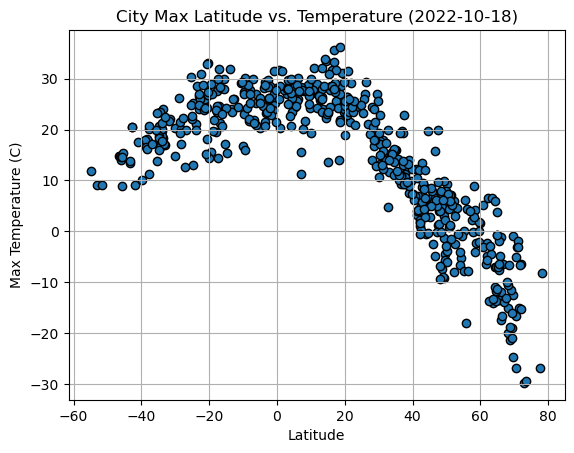

In [128]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

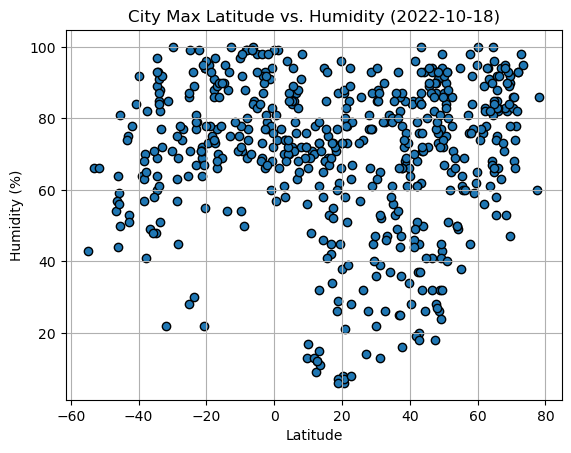

In [129]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolor="black" )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

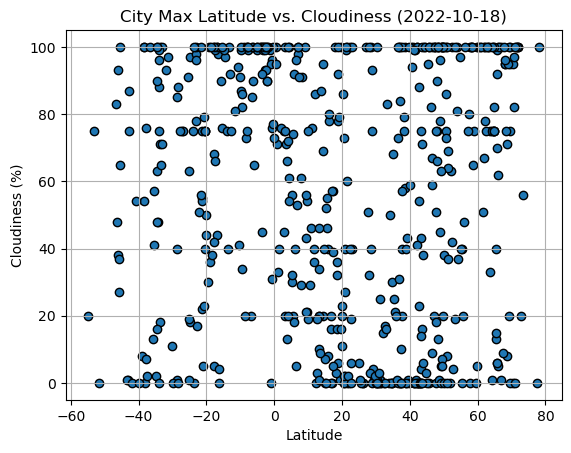

In [109]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

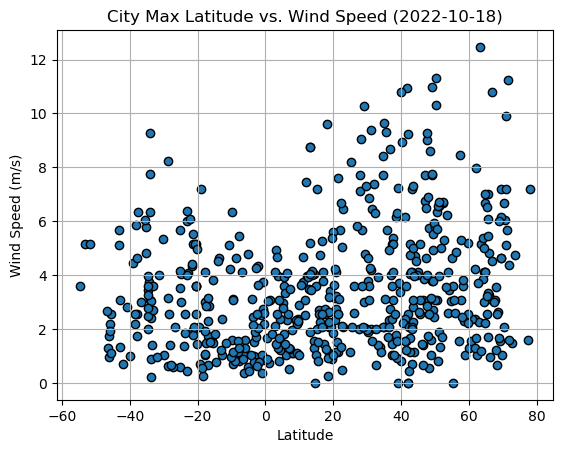

In [110]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [112]:
# Define a function to create Linear Regression plots
# x_values = city_data_df['Lat']
# y_values = city_data_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The R Squared is: {rvalue**2}")
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max temperature (C)')
# plt.show()

The R Squared is: 0.052617397101782246


In [114]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
#north_list = []
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,12.65,68,58,1.79,PT,1680493777
3,san pedro,14.3500,121.0167,33.51,58,20,1.54,PH,1680493778
4,hasaki,35.7333,140.8333,14.22,53,21,9.31,JP,1680493484
5,georgetown,5.4112,100.3354,26.96,94,20,3.60,MY,1680493499
6,semirara,12.0697,121.3986,27.23,78,86,7.47,PH,1680493778


In [115]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,18.43,88,100,0.89,ZA,1680493778
2,ushuaia,-54.8000,-68.3000,11.81,43,20,3.60,AR,1680493778
7,carnarvon,-24.8667,113.6333,25.28,71,97,4.05,AU,1680493778
8,salinopolis,-0.6136,-47.3561,25.17,83,96,3.76,BR,1680493778
9,simplicio mendes,-7.8539,-41.9103,21.60,77,99,0.81,BR,1680493778


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8346521601431159


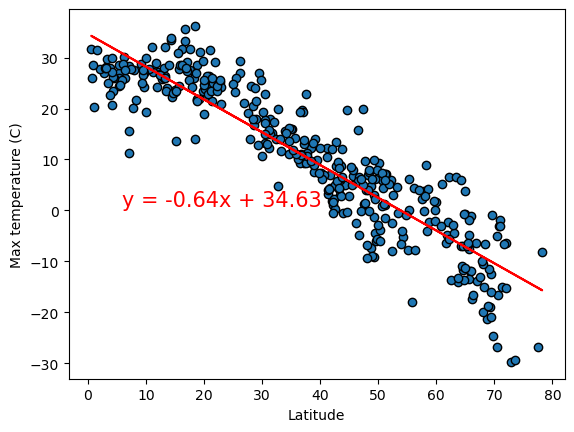

In [116]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values, edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.show()

The r-value is: 0.4427472447866725


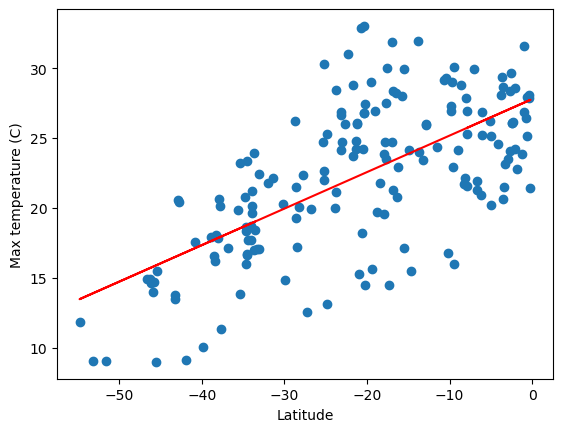

In [117]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Both Northern hemisphere and southern show a high r-value which indicates that the max temperature increases  as latitude gets near zero. Indicating a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04637096447607382


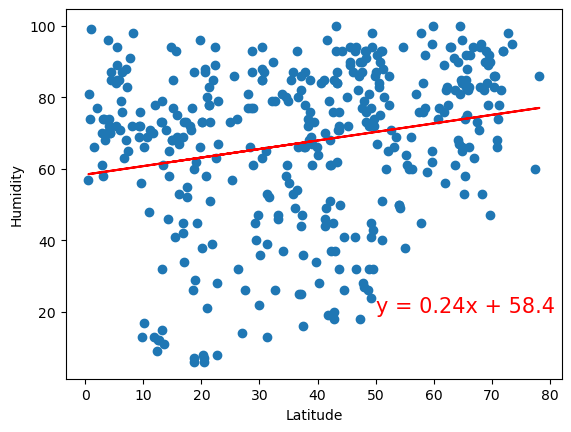

In [132]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.15143888367017305


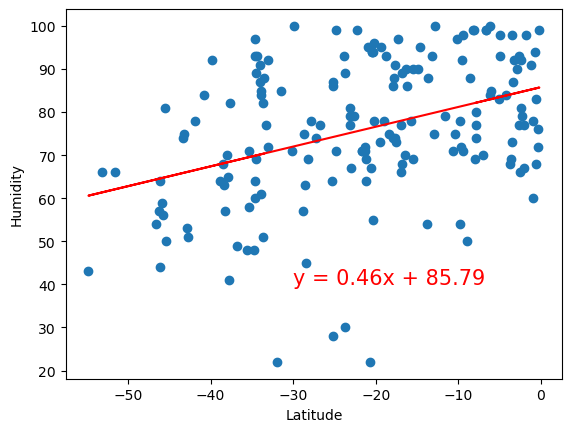

In [135]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
  
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-value is relatively low, showing a negative correlation. Latitude does not seem to impact humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03376638555487654


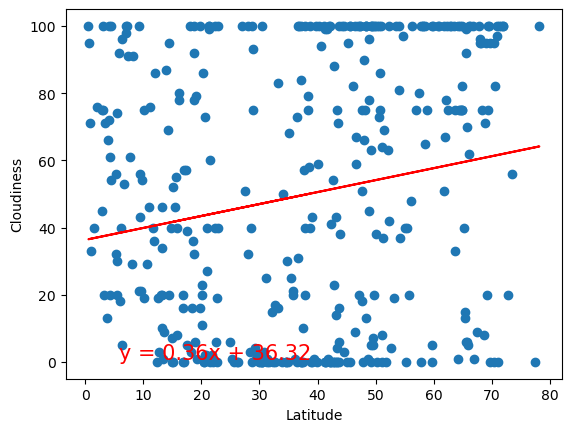

In [122]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.1435285592347979


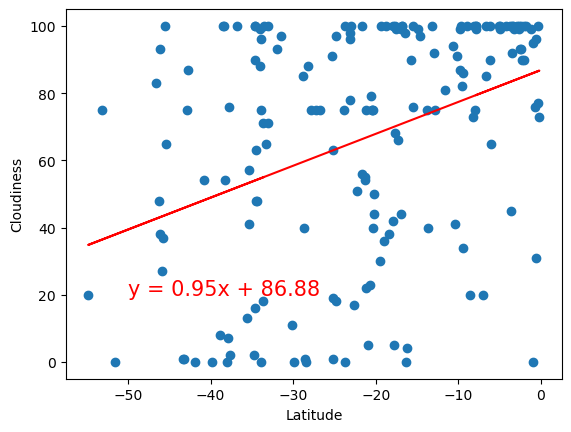

In [136]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Cloudiness does not show any change with latitude. r-values are relatively low, so no correlation between the 2.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04536052986077014


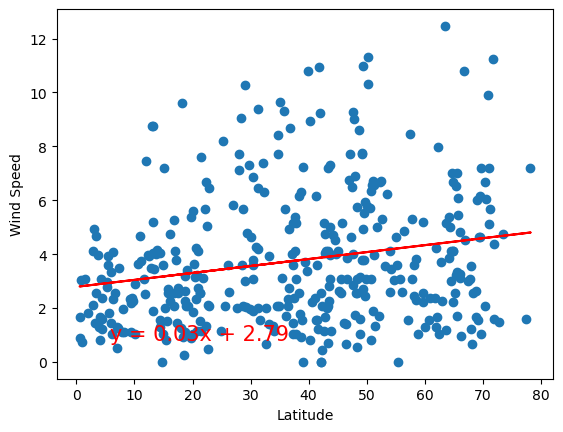

In [124]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.059283802454333484


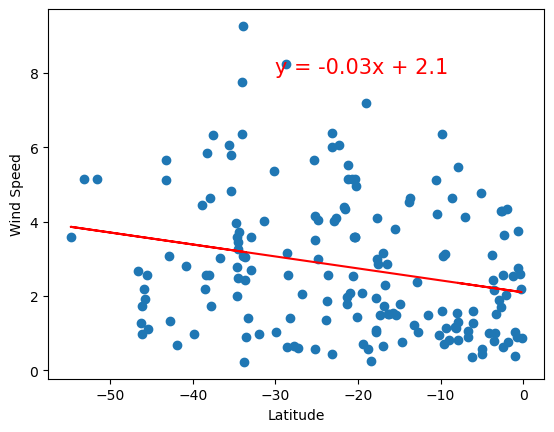

In [138]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Wind speed does not seem to change with latitude. Both r-values are relatively low, so no correlation between the 2 factors.